In [89]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [ ]:

nltk.download('punkt')
nltk.download('wordnet')

In [91]:
# preprocessing function

def preprocess_input(text):

    # segmenting text into tokens

    tokens = nltk.tokenize.word_tokenize(text)

    # lemmatising words to their base form

    lemmatizer = nltk.stem.WordNetLemmatizer()

    tokens_lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

    processed = " ".join(tokens_lemmatized)

    return processed

In [ ]:
nltk.download('vader_lexicon')

# using the vader sentiment analyzer 

analyzer = SentimentIntensityAnalyzer()

# analyzing scores

def analysis(text, compound_score_threshold):

    sentiment_score = analyzer.polarity_scores(text)
    sentiment = 1 if sentiment_score['compound'] > compound_score_threshold else 0

    return sentiment
    

In [93]:

import pandas as pd

In [94]:
# loading test dataset

df_train = pd.read_csv("train.csv")

df_train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [95]:
# applying the preprocessing function to the dataset

df_train['text'] = df_train['text'].apply(preprocess_input)

In [96]:
import sklearn.metrics
import numpy

In [97]:
# applying analysis, checking accuracies

threshold_trials = numpy.arange(-1, 1.1, 0.1)

accuracy_scores = []

for threshold in threshold_trials:
    df_train['sentiment_score'] = df_train['text'].apply(lambda x: analysis(x, threshold))
    accuracy_scores.append(sklearn.metrics.accuracy_score(df_train['label'], df_train['sentiment_score']))


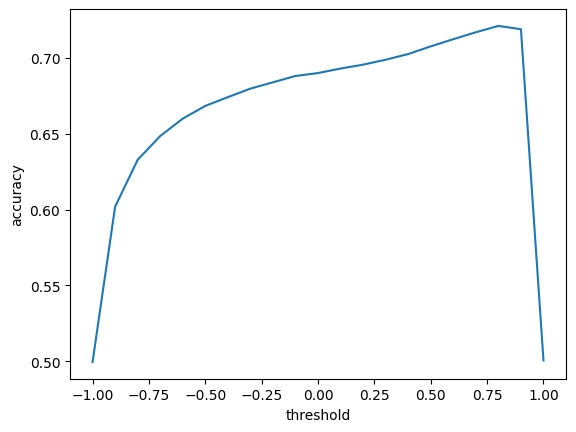

[0.499525, 0.60195, 0.632875, 0.648575, 0.66005, 0.66845, 0.674225, 0.67985, 0.684025, 0.6882, 0.690125, 0.6931, 0.695675, 0.698925, 0.702675, 0.70775, 0.712475, 0.71705, 0.721225, 0.71905, 0.500475]


In [105]:
# plotting

import matplotlib.pyplot as plt

plt.plot(threshold_trials, accuracy_scores) 
plt.ylabel("accuracy")
plt.xlabel("threshold")
plt.show()

In [106]:
# displays the threshold corresponding to the max accuracy

max_accuracy_threshold = threshold_trials[accuracy_scores.index(max(accuracy_scores))]
print(max_accuracy_threshold)

# this threshold seems quite high. this will likely hold up better for longer, comprehensive texts with a consistent emotion judging by the nature of the dataset

0.721225
0.7999999999999996


In [107]:
# testing

df_test = pd.read_csv('test.csv')

# confusion matrix

df_test['sentiment_score'] = df_test['text'].apply(lambda x: analysis(x, max_accuracy_threshold))
print(sklearn.metrics.confusion_matrix(df_test['label'], df_test['sentiment_score']))

# accuracy score on test set

print(sklearn.metrics.accuracy_score(df_test['label'], df_test['sentiment_score']))

[[1781  714]
 [ 701 1804]]
0.717
